Investigate the specific relationship between non-English speaking, and educational attainment, employment within the context of Los Angeles County:
This project researches how non-English speaking impact social equity,  which addresses these disparities to inform strategies  and promote pathways to equality of education and employment.  

**Do limited English households face challenges in accessing educational levels and employment?**

**do non-english speaking households have spatial autocorrelation within the regions?**


#setting

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
!pip install geopandas shapely fiona pyproj rtree contextily mapclassify pysal

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 543.2/543.2 kB 8.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.6/58.6 kB 7.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.5/21.5 MB 54.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.8/2.8 MB 76.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 132.4/132.4 kB 16.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.1/61.1 kB 7.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.0/59.0 kB 7.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 141.3/141.3 kB 15.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.9/53.9 kB 6.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.9/47.9 kB 6.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 278.0/278.0 kB 24.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.4/41.4 kB 4.7 MB/s eta 0:00:00
  Preparing metadata (setup.p

In [4]:
! pip install pingouin

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 198.9/198.9 kB 3.9 MB/s eta 0:00:00


In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
from shapely.geometry import box
import geopandas as gpd
import fiona
import pingouin as pg
import seaborn as sns
from scipy import stats
from splot.esda import moran_scatterplot, lisa_cluster
from esda.moran import Moran, Moran_Local
from splot.esda import plot_local_autocorrelation
from splot.esda import plot_moran

In [6]:
from libpysal.weights.contiguity import Rook
import splot
from esda.moran import Moran

In [7]:
from splot.esda import moran_scatterplot, lisa_cluster
from esda.moran import Moran, Moran_Local
from splot.esda import plot_local_autocorrelation
from splot.esda import plot_moran
from pysal.explore import esda  # Exploratory Spatial analytics
from pysal.lib import weights  # Spatial weights

/usr/local/lib/python3.10/dist-packages/spaghetti/network.py:41: FutureWarning: The next major release of pysal/spaghetti (2.0.0) will drop support for all ``libpysal.cg`` geometries. This change is a first step in refactoring ``spaghetti`` that is expected to result in dramatically reduced runtimes for network instantiation and operations. Users currently requiring network and point pattern input as ``libpysal.cg`` geometries should prepare for this simply by converting to ``shapely`` geometries.
  warnings.warn(dep_msg, FutureWarning, stacklevel=1)


In [8]:
from libpysal.examples import available
from pysal.model import spreg
from pysal.lib import weights
from pysal.explore import esda

from scipy import stats
import statsmodels.formula.api as sm


#data

i already output the **merge_lim_eng**  and **merge_labor_lim_eng** as geojson file,
so you can only improt the [**merge_lim_eng**](https://https://github.com/sujiatong/calteknet/blob/main/merge_lim_eng.json) and [**merge_labor_lim_eng**](https://github.com/sujiatong/calteknet/blob/main/merge_labor_lim_eng.geojson.zip) mfile that skip data processing and mergeing step.

please download file from [here](https://github.com/sujiatong/calteknet/blob/main/merge_lim_eng.json)

## import data

## limited langaue

polygon:

Count and percent of households with limited English, ACS 2020 5-Yr https://data.lacounty.gov/datasets/lacounty::limited-english-households-census-tract/about

In [9]:
limited_english =gpd.read_file("/content/drive/MyDrive/Calteknet/Limited_English_Households_(census_tract)/Limited_English_Households_(census_tract).shp")

In [10]:
limited_english.head() #limited_english_pct # polygon

,tract,limited_en,limited__1,limited__2,sup_dist,csa,spa,ESRI_OID,Shape__Are,Shape__Len,geometry
0,06037199700,974,2893,33.7,District 1,Los Angeles - Wholesale District,SPA 4 - Metro,2347,1.041050e+07,13808.463241,"POLYGON ((-118.22672 34.06242, -118.22453 34.0..."
1,06037199801,1489,3243,45.9,District 1,Los Angeles - Lincoln Heights,SPA 4 - Metro,2348,3.724107e+06,9459.391827,"POLYGON ((-118.21559 34.07186, -118.21169 34.0..."
2,06037199802,1167,2270,51.4,District 1,Los Angeles - Lincoln Heights,SPA 4 - Metro,2349,3.296129e+06,8868.744225,"POLYGON ((-118.21563 34.07365, -118.21309 34.0..."
3,06037199900,1010,2532,39.9,District 1,Los Angeles - Lincoln Heights,SPA 4 - Metro,2350,4.782361e+06,10141.728022,"POLYGON ((-118.21528 34.06349, -118.21547 34.0..."
4,06037201110,565,2098,26.9,District 1,Los Angeles - El Sereno,SPA 4 - Metro,2351,1.099246e+07,15893.383636,"POLYGON ((-118.18182 34.09277, -118.18039 34.0..."


tract data:
the American Community Survey (ACS) s1602(limitd english speaks household 2022-5yr)

[s1601](https://https://data.census.gov/table/ACSST1Y2022.S1601?text=Table%20s2301&g=040XX00US53_050XX00US53057_010XX00US)

In [11]:
limit_eng =pd.read_csv("/content/drive/MyDrive/Calteknet/Limited_English_Households_(census_tract)/limit_eng_5Y_2022.S1602-Data copy.csv")

In [12]:
deleted_chars = 9 #define number of charter delete

In [13]:
limit_eng['GEO_ID'] = limit_eng['GEO_ID'].str[deleted_chars:]

In [14]:
limit_eng.head()

,GEO_ID,NAME,S1602_C01_001E,S1602_C01_001M,S1602_C01_002E,S1602_C01_002M,S1602_C01_003E,S1602_C01_003M,S1602_C01_004E,S1602_C01_004M,...,S1602_C04_001M,S1602_C04_002E,S1602_C04_002M,S1602_C04_003E,S1602_C04_003M,S1602_C04_004E,S1602_C04_004M,S1602_C04_005E,S1602_C04_005M,Unnamed: 42
0,06037101110,Census Tract 1011.10; Los Angeles County; Cali...,1551,130,333,121,542,129,141,53,...,6.4,15.0,14.4,30.3,13.7,17.7,14.7,0.0,91.2,NaN
1,06037101122,Census Tract 1011.22; Los Angeles County; Cali...,1383,160,128,65,485,159,152,49,...,6.9,0.0,26.3,24.7,18.5,0.0,22.9,-,**,NaN
2,06037101220,Census Tract 1012.20; Los Angeles County; Cali...,1349,208,391,148,305,76,205,160,...,5.2,1.3,2.4,56.7,15.4,12.2,12.5,0.0,54.8,NaN
3,06037101221,Census Tract 1012.21; Los Angeles County; Cali...,1424,293,361,107,489,237,112,77,...,14.6,29.1,19.3,55.2,28.5,0.0,29.2,100.0,41.5,NaN
4,06037101222,Census Tract 1012.22; Los Angeles County; Cali...,928,146,294,130,447,150,55,53,...,13.5,4.8,8.0,55.5,21.4,0.0,44.4,0.0,84.9,NaN


## employment

polygon

In [15]:
unemployment =gpd.read_file("/content/drive/MyDrive/Calteknet/Unemployment_(census_tract)/Unemployment__census_tract_.shp")

s2601

In [16]:
labor_2601 =pd.read_csv("/content/drive/MyDrive/Calteknet/Unemployment_(census_tract)/ACSST5Y2022.S2301_labor/ACSST5Y2022employment.csv")

In [17]:
deleted_chars = 9 #define number of charter delete

In [18]:
labor_2601['GEO_ID'] = labor_2601['GEO_ID'].str[deleted_chars:]

## merge data
merge polygon and tract data


### merge limted english

In [19]:
merge_lim_eng = pd.merge(limited_english, limit_eng, left_on='tract', right_on='GEO_ID', how='left')

In [20]:
merge_lim_eng.head() #s1602_polygon

,tract,limited_en,limited__1,limited__2,sup_dist,csa,spa,ESRI_OID,Shape__Are,Shape__Len,...,S1602_C04_001M,S1602_C04_002E,S1602_C04_002M,S1602_C04_003E,S1602_C04_003M,S1602_C04_004E,S1602_C04_004M,S1602_C04_005E,S1602_C04_005M,Unnamed: 42
0,06037199700,974,2893,33.7,District 1,Los Angeles - Wholesale District,SPA 4 - Metro,2347,1.041050e+07,13808.463241,...,5.7,20.8,10.7,0.0,79.8,28.3,17.2,-,**,NaN
1,06037199801,1489,3243,45.9,District 1,Los Angeles - Lincoln Heights,SPA 4 - Metro,2348,3.724107e+06,9459.391827,...,10.1,16.5,12.9,-,**,40.5,18.7,-,**,NaN
2,06037199802,1167,2270,51.4,District 1,Los Angeles - Lincoln Heights,SPA 4 - Metro,2349,3.296129e+06,8868.744225,...,10.4,23.6,17.6,0.0,65.8,41.9,18.8,-,**,NaN
3,06037199900,1010,2532,39.9,District 1,Los Angeles - Lincoln Heights,SPA 4 - Metro,2350,4.782361e+06,10141.728022,...,11.5,31.8,14.9,0.0,63.3,66.7,25.2,-,**,NaN
4,06037201110,565,2098,26.9,District 1,Los Angeles - El Sereno,SPA 4 - Metro,2351,1.099246e+07,15893.383636,...,4.8,6.3,6.2,0.0,100.0,41.7,32.3,-,**,NaN


In [21]:
merge_lim_eng = merge_lim_eng.replace(['-', '**'], 0) # delete non-number data


In [22]:
# merge_lim_eng.to_file("output_shapefile.geojson", driver="GeoJSON")
# i already output the merge_lim_eng as geojson file,
# so you can only improt the merge_lim_eng file that skip data processing and mergeing step.


### merge employment

In [23]:
merge_labor = pd.merge(unemployment, labor_2601, left_on='tract', right_on='GEO_ID', how='left') #s2301_polygon

In [24]:
merge_labor = merge_labor.replace(['-', '**','NaN'], 0)


In [25]:
#merge_labor.to_file("merge_labor.geojson", driver="GeoJSON")
# i already output the merge_labor as geojson file,
# so you can only improt the merge_labor file that skip data processing and mergeing step.


## s1601

In [26]:
lim_eng_1601 =pd.read_csv("/content/drive/MyDrive/Calteknet/Limited_English_Households_(census_tract)/ACSST5Y2022.S1601_2024-01-16T024156/ACSST5Y2022.S1601-Data.revise 2 2.csv")

In [27]:
deleted_chars = 9 #define number of charter delete

In [28]:
lim_eng_1601['GEO_ID'] = lim_eng_1601['GEO_ID'].str[deleted_chars:]

In [29]:
merge_labor_lim_eng = pd.merge(merge_labor, lim_eng_1601, left_on='GEO_ID', right_on='GEO_ID', how='left') #merge data

In [30]:
merge_labor_lim_eng = merge_labor_lim_eng.replace(['-', '**'], 0)


In [31]:
merge_labor_lim_eng.to_file("merge_labor_lim_eng.geojson", driver="GeoJSON")

In [32]:
merge_labor_lim_eng.head()

,OBJECTID,tract,name,unemployme,sup_dist,csa,spa,SHAPE_Leng,SHAPE_Area,geometry,...,S1601_C06_020M,S1601_C06_021E,S1601_C06_021M,S1601_C06_022E,S1601_C06_022M,S1601_C06_023E,S1601_C06_023M,S1601_C06_024E,S1601_C06_024M,Unnamed: 290
0,1,06037101110,1011.10,2.9,District 5,Los Angeles - Tujunga,SPA 2 - San Fernando,0.046261,0.000112,"POLYGON ((-118.30077 34.25961, -118.30077 34.2...",...,7.6,(X),(X),39.5,10.6,31.7,16.4,43.2,14.1,NaN
1,2,06037101122,1011.22,7.0,District 5,Los Angeles - Tujunga,SPA 2 - San Fernando,0.090761,0.000265,"POLYGON ((-118.30321 34.27334, -118.29971 34.2...",...,12.2,(X),(X),37.1,16.1,5.9,9.3,40.9,16.4,NaN
2,3,06037101220,1012.20,8.8,District 5,Los Angeles - Tujunga,SPA 2 - San Fernando,0.037876,0.000068,"POLYGON ((-118.28594 34.25228, -118.28594 34.2...",...,6.0,(X),(X),36.7,8.9,7.9,6.5,57.4,13.7,NaN
3,4,06037101221,1012.21,2.3,District 5,Los Angeles - Tujunga,SPA 2 - San Fernando,0.028432,0.000035,"POLYGON ((-118.29946 34.25598, -118.29319 34.2...",...,12.8,(X),(X),53.8,14.3,38.5,28.6,59.6,15.3,NaN
4,5,06037101222,1012.22,7.7,District 5,Los Angeles - Tujunga,SPA 2 - San Fernando,0.029524,0.000028,"POLYGON ((-118.29319 34.25233, -118.28863 34.2...",...,9.2,(X),(X),50.8,12.7,12.3,14.2,64.3,13.7,NaN


# Limited English Households Analysis
please see the **limited_eng_analysis.pdf** file from [git hub](https://github.com/sujiatong/calteknet/blob/main/limited_eng_analysis.pdf)

##Estimate!!Limited English-speaking households!!All households


In [33]:
merge_lim_eng['S1602_C04_004E'] = merge_lim_eng['S1602_C04_004E'].astype(float)
merge_lim_eng['S1602_C04_001E'] = merge_lim_eng['S1602_C04_001E'].astype(float)
#estimate!!Percent limited English-speaking households!!All households
#convert dtypes

Estimate!!Limited English-speaking households!!All households

Text(0.5, 1.0, 'Limited English-speaking households')

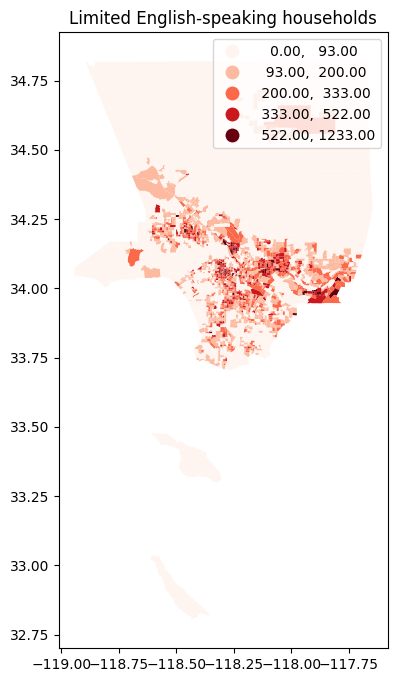

In [34]:
merge_lim_eng.plot(column = 'S1602_C03_001E', scheme='fisher_jenks', cmap='Reds', legend=True, figsize=(10,8)).set_title('Limited English-speaking households')


In [35]:
aov = pg.anova(dv='S1602_C03_001E', between='spa', data=merge_lim_eng,
               detailed=True)

#Estimate!!Percent limited English-speaking households!!All households

aov

,Source,SS,DF,MS,F,p-unc,np2
0,spa,5.017748e+06,7,716821.137348,40.158459,8.110176e-54,0.101553
1,Within,4.439249e+07,2487,17849.816803,NaN,NaN,NaN


### gobal moran

In [ ]:
y_lim = merge_lim_eng['S1602_C03_001E'].values
w_lim = weights.Queen.from_dataframe(merge_lim_eng)

<ipython-input-29-af7c2af0dd7c>:2: FutureWarning: `use_index` defaults to False but will default to True in future. Set True/False directly to control this behavior and silence this warning
  w_lim = weights.Queen.from_dataframe(merge_lim_eng)
/usr/local/lib/python3.10/dist-packages/libpysal/weights/contiguity.py:347: UserWarning: The weights matrix is not fully connected: 
 There are 2 disconnected components.
  W.__init__(self, neighbors, ids=ids, **kw)


In [ ]:
w_lim.transform = 'r'

In [ ]:
moran_lim = Moran(y_lim, w_lim)
print("Moran's I:", moran_lim.I)
print("Moran's p-val:", moran_lim.p_sim)

Moran's I: 0.4806384323008868
Moran's p-val: 0.001


/usr/local/lib/python3.10/dist-packages/splot/_viz_esda_mpl.py:354: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sbn.kdeplot(moran.sim, shade=shade, color=color, ax=ax, **kwargs)


(<Figure size 1000x400 with 2 Axes>,
 array([<Axes: title={'center': 'Reference Distribution'}, xlabel='Moran I: 0.48', ylabel='Density'>,
        <Axes: title={'center': 'Moran Scatterplot (0.48)'}, xlabel='Attribute', ylabel='Spatial Lag'>],
       dtype=object))

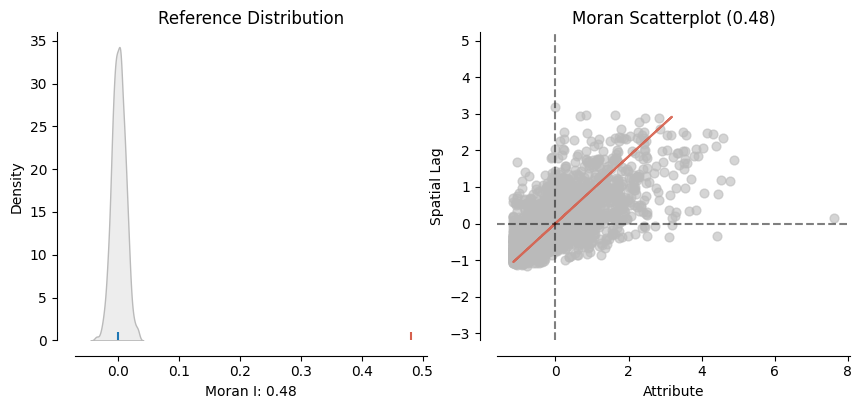

In [ ]:
plot_moran(moran_lim, zstandard=True, figsize=(10,4))

A Moran's I value of 0.48 indicates a moderate positive spatial autocorrelation in the variables. The Moran scatterplot shows that the Low-Low value tends to cluster together.

In [ ]:
moran_loc_lim = Moran_Local(y_lim, w_lim)

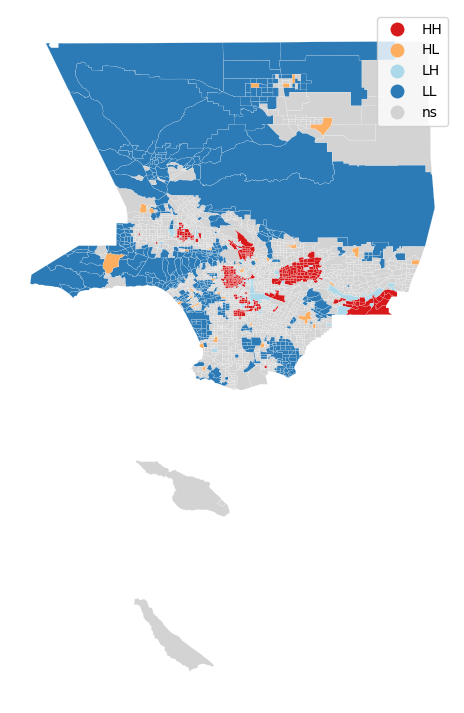

In [ ]:
lisa_cluster(moran_loc_lim, merge_lim_eng, p=0.05, figsize = (9,9))
plt.show()

The hotspot area is located in the DTLA and San Gabriel area where limited English Households in this area and its surroundings are larger than average.

The coldspot area is located in the Northern and West LA area, signifying concentrated areas with lower levels of limited English households surrounded by similarly low prevalence in their vicinity.



## estimate!Households speaking --!!Spanish

Text(0.5, 1.0, 'Limited English-speaking households --!!Spanish')

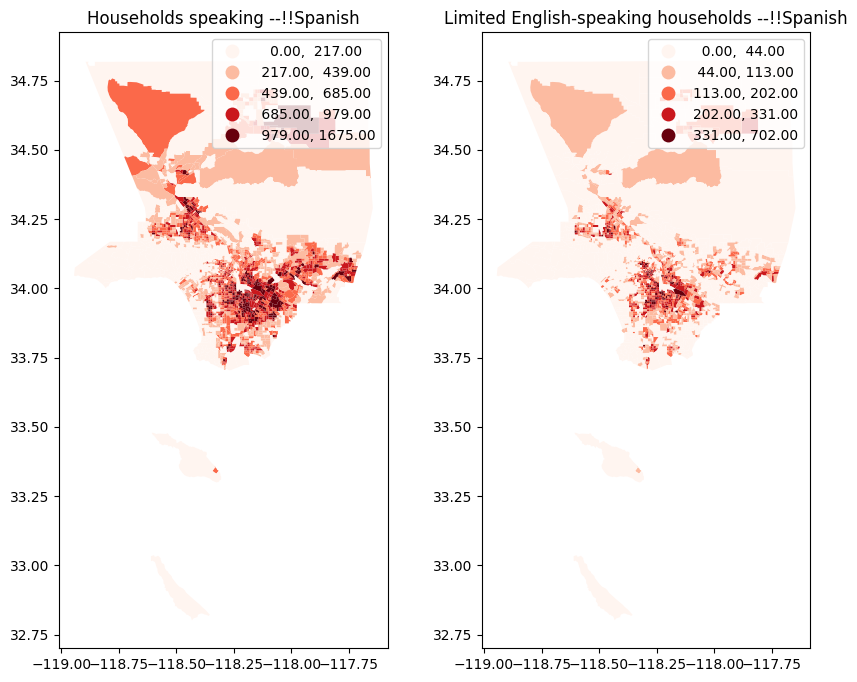

In [ ]:
fig, (ax1,ax2) = plt.subplots(1,2, figsize=(10,8))

merge_lim_eng.plot(column = 'S1602_C01_002E', scheme='fisher_jenks', cmap='Reds', legend=True, ax=ax1)
ax1.set_title('Households speaking --!!Spanish')

merge_lim_eng.plot(column = 'S1602_C03_002E', scheme='fisher_jenks', cmap='Reds', legend=True, ax=ax2)
ax2.set_title('Limited English-speaking households --!!Spanish')


In [36]:
aov_spa_lim_eng = pg.anova(dv='S1602_C01_002E', between='spa', data=merge_lim_eng, detailed=True)
#calculate anova

aov_spa_lim_eng #print anova output

,Source,SS,DF,MS,F,p-unc,np2
0,spa,5.388937e+07,7,7.698482e+06,98.126607,7.111244e-127,0.216418
1,Within,1.951165e+08,2487,7.845458e+04,NaN,NaN,NaN


In [40]:

aov_spa = pg.anova(dv='S1602_C03_002E', between='spa', data=merge_lim_eng, detailed=True)
#calculate anova

aov_spa #print anova output


,Source,SS,DF,MS,F,p-unc,np2
0,spa,3.818675e+06,7,545524.946987,65.648617,4.332156e-87,0.155959
1,Within,2.066640e+07,2487,8309.770606,NaN,NaN,NaN


Null hypothesis: no significant difference in the average number of limited English speaking households and spanish speaking household across the different SPA regions


Both of the p-values are **smaller** than the significant level, thus we can reject the null hypothesis. Spanish-speaking households and the Limited English-speaking Spanish households are **largely different** among SPA regions.

Both of the F ratios are higher than 1.0, so the variation among group means is more than you'd expect to see by chance, and the null hypothesis is false, which means **stronger variation** among the SPA region.

### gobal moran

In [ ]:
y_lim_span = merge_lim_eng['S1602_C03_002E'].values
w_lim_span = Rook.from_dataframe(merge_lim_eng)
w_lim_span.transform = 'r'

<ipython-input-36-17ac9d5af28b>:2: FutureWarning: `use_index` defaults to False but will default to True in future. Set True/False directly to control this behavior and silence this warning
  w_lim_span = Rook.from_dataframe(merge_lim_eng)
/usr/local/lib/python3.10/dist-packages/libpysal/weights/contiguity.py:61: UserWarning: The weights matrix is not fully connected: 
 There are 2 disconnected components.
  W.__init__(self, neighbors, ids=ids, **kw)


In [ ]:
moran_lim_span = Moran(y_lim_span, w_lim_span)
print("Moran's I:", moran_lim_span.I)
print("Moran's p-val:", moran_lim_span.p_sim)

Moran's I: 0.576756391592528
Moran's p-val: 0.001


/usr/local/lib/python3.10/dist-packages/splot/_viz_esda_mpl.py:354: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sbn.kdeplot(moran.sim, shade=shade, color=color, ax=ax, **kwargs)


(<Figure size 1000x400 with 2 Axes>,
 array([<Axes: title={'center': 'Reference Distribution'}, xlabel='Moran I: 0.58', ylabel='Density'>,
        <Axes: title={'center': 'Moran Scatterplot (0.58)'}, xlabel='Attribute', ylabel='Spatial Lag'>],
       dtype=object))

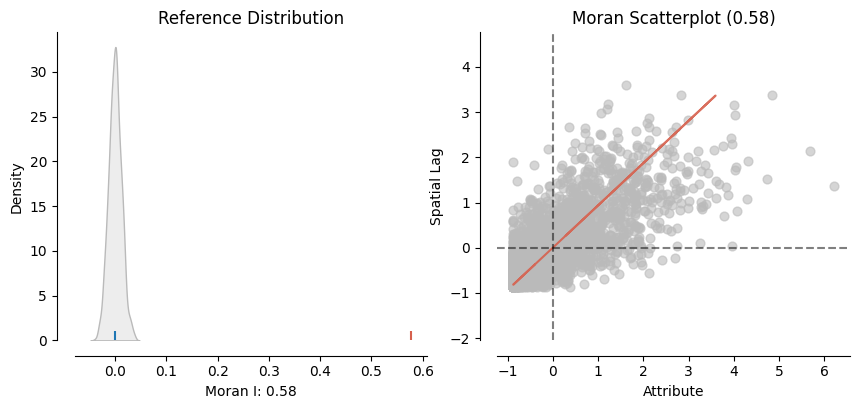

In [ ]:
plot_moran(moran_lim_span, zstandard=True, figsize=(10,4))

A Moran's I value of 0.58 indicates a positive spatial autocorrelation in the variables， which means not completely spatial randomness, having moderate spatial autocorrelation.

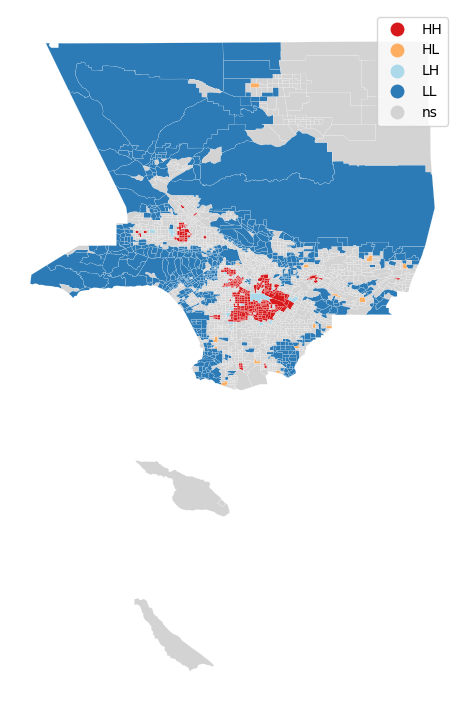

In [ ]:
moran_loc_lim_span = Moran_Local(y_lim_span, w_lim_span)
lisa_cluster(moran_loc_lim_span, merge_lim_eng, p=0.05, figsize = (9,9))
plt.show()

Cluster:
The hotspot area is located in South LA, which represents areas where Limited-English speaking households in this area and its surroundings are larger than average.

The Coldspot area is located in the west LA and San Gabriel Valley area, and it represents significant clusters of less Limited-English speaking household values surrounded by less Limited-English speaking household values.

## Estimate!!Households speaking --!!Other Indo-European languages

Text(0.5, 1.0, 'Limited English-speaking households --!!Other Indo-European languages')

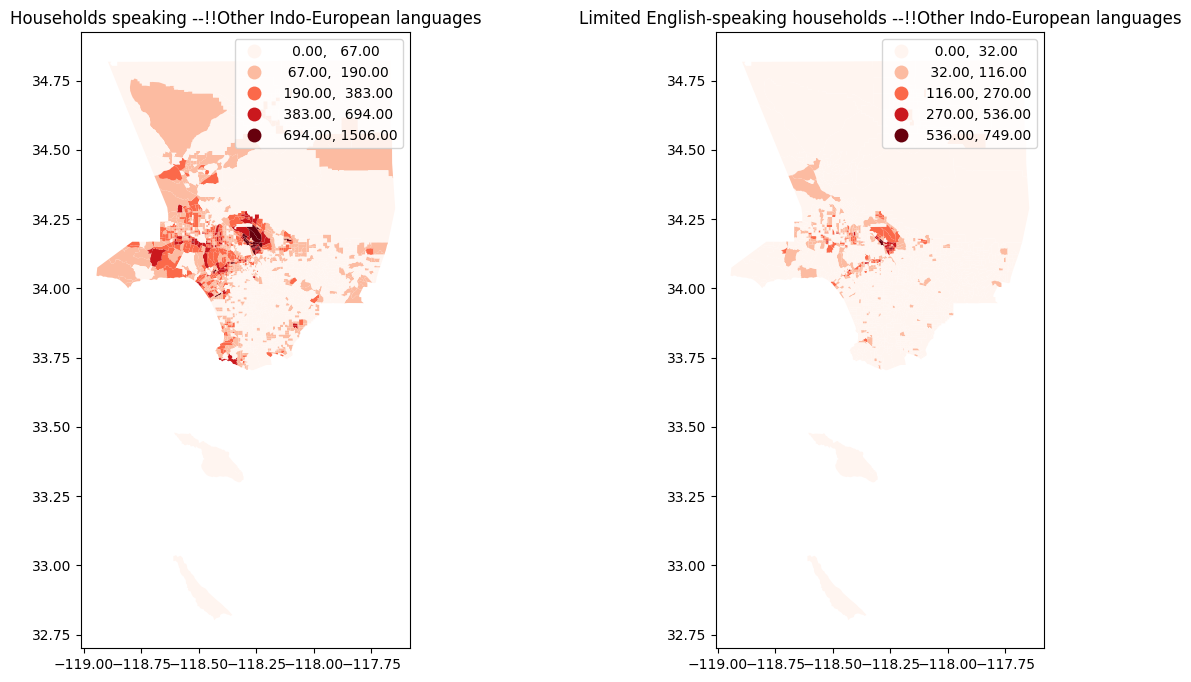

In [ ]:
fig, (ax1,ax2) = plt.subplots(1,2, figsize=(15,8))

merge_lim_eng.plot(column = 'S1602_C01_003E', scheme='fisher_jenks', cmap='Reds', legend=True, ax=ax1)
ax1.set_title('Households speaking --!!Other Indo-European languages')

merge_lim_eng.plot(column = 'S1602_C03_003E', scheme='fisher_jenks', cmap='Reds', legend=True, ax=ax2)
ax2.set_title('Limited English-speaking households --!!Other Indo-European languages')

### gobal moran

In [41]:
y_eur_lim = merge_lim_eng['S1602_C03_003E'].values
w_eur_lim = Rook.from_dataframe(merge_lim_eng)
w_eur_lim.transform = 'r'

<ipython-input-41-4a355c4c2afa>:2: FutureWarning: `use_index` defaults to False but will default to True in future. Set True/False directly to control this behavior and silence this warning
  w_eur_lim = Rook.from_dataframe(merge_lim_eng)
/usr/local/lib/python3.10/dist-packages/libpysal/weights/contiguity.py:61: UserWarning: The weights matrix is not fully connected: 
 There are 2 disconnected components.
  W.__init__(self, neighbors, ids=ids, **kw)


In [ ]:
moran_eur_lim = Moran(y_eur_lim, w_eur_lim)
print("Moran's I:", moran_eur_lim.I)
print("Moran's p-val:", moran_eur_lim.p_sim)

Moran's I: 0.5781701751521723
Moran's p-val: 0.001


/usr/local/lib/python3.10/dist-packages/splot/_viz_esda_mpl.py:354: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sbn.kdeplot(moran.sim, shade=shade, color=color, ax=ax, **kwargs)


(<Figure size 1000x400 with 2 Axes>,
 array([<Axes: title={'center': 'Reference Distribution'}, xlabel='Moran I: 0.58', ylabel='Density'>,
        <Axes: title={'center': 'Moran Scatterplot (0.58)'}, xlabel='Attribute', ylabel='Spatial Lag'>],
       dtype=object))

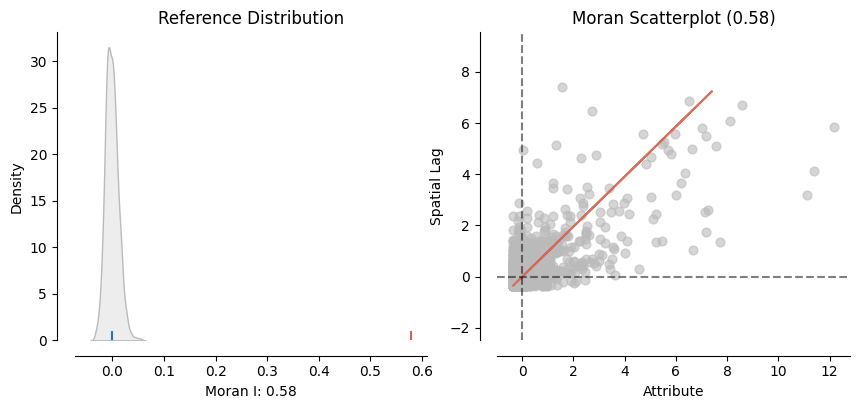

In [ ]:
plot_moran(moran_eur_lim, zstandard=True, figsize=(10,4))

A Moran's I value of 0.58 indicates a positive spatial autocorrelation in the variables, which means not completely spatial randomness, having relatively high spatial autocorrelation, and values tend to cluster together.

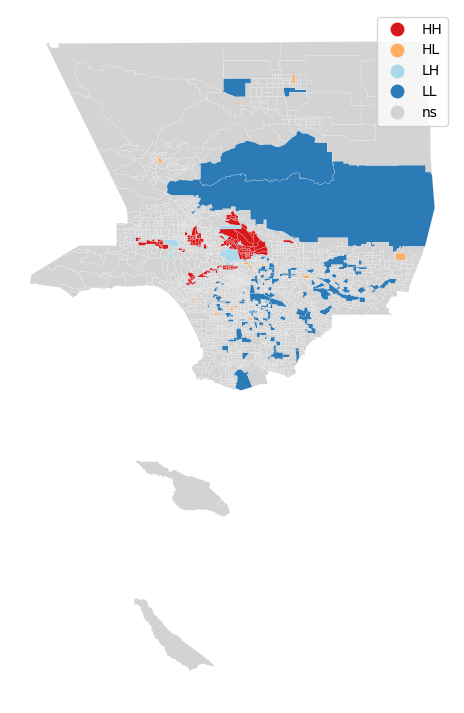

In [ ]:
moran_loc_eur_lim = Moran_Local(y_eur_lim, w_eur_lim)
lisa_cluster(moran_loc_eur_lim, merge_lim_eng, p=0.05, figsize = (9,9))
plt.show()

Cluster:
The hotspot area is located in South LA, which represents areas where Limited-English households in this area and its surroundings are more than average.

The Coldspot area is located in the west LA and San Gabriel Valley area, and it represents significant clusters of less Limited-English speaking household values surrounded by less Limited-English household values.

## Estimate!!Percent!!All households!!Households speaking --!!Asian and Pacific Island languages

Text(0.5, 1.0, 'Limited English-speaking households --!!Asian and Pacific Island languages')

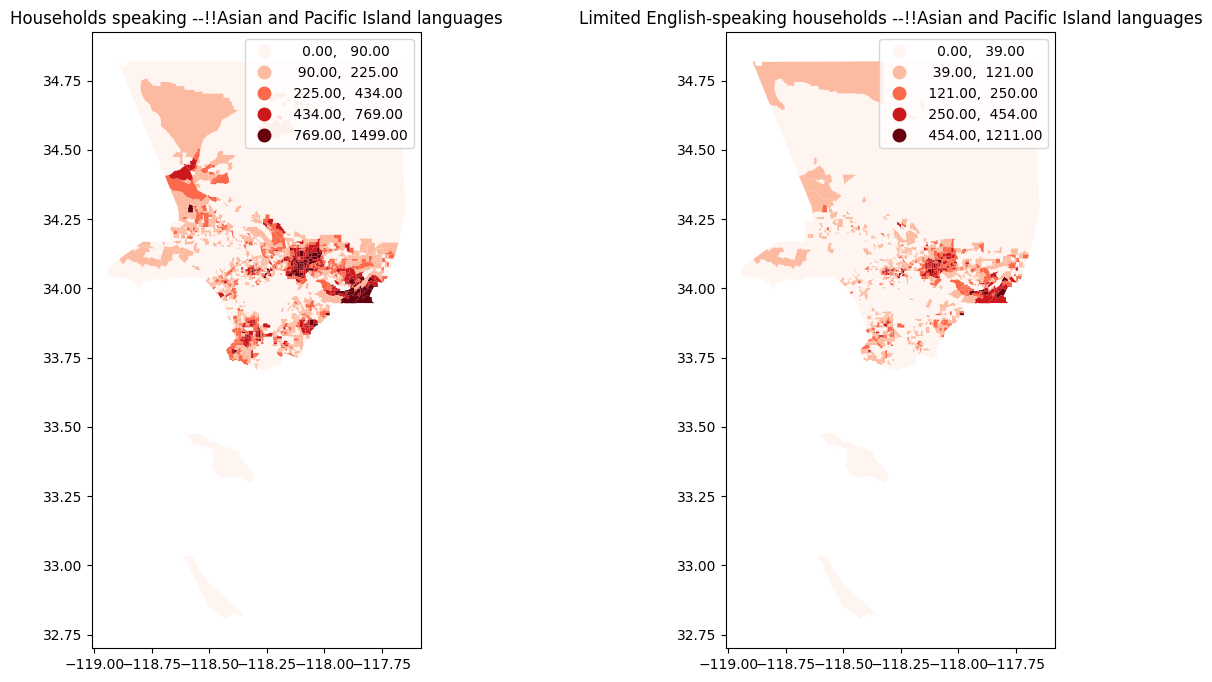

In [ ]:
fig, (ax1,ax2) = plt.subplots(1,2, figsize=(15,8))

merge_lim_eng.plot(column = 'S1602_C01_004E', scheme='fisher_jenks', cmap='Reds', legend=True, ax=ax1)
ax1.set_title('Households speaking --!!Asian and Pacific Island languages')

merge_lim_eng.plot(column = 'S1602_C03_004E', scheme='fisher_jenks', cmap='Reds', legend=True, ax=ax2)
ax2.set_title('Limited English-speaking households --!!Asian and Pacific Island languages')

### gobal moran

In [ ]:
y_asian_lim = merge_lim_eng['S1602_C03_004E'].values
w_asian_lim = Rook.from_dataframe(merge_lim_eng)
w_asian_lim.transform = 'r'

<ipython-input-46-a0c3b89c949f>:2: FutureWarning: `use_index` defaults to False but will default to True in future. Set True/False directly to control this behavior and silence this warning
  w_asian_lim = Rook.from_dataframe(merge_lim_eng)
/usr/local/lib/python3.10/dist-packages/libpysal/weights/contiguity.py:61: UserWarning: The weights matrix is not fully connected: 
 There are 2 disconnected components.
  W.__init__(self, neighbors, ids=ids, **kw)


In [ ]:
moran_asian_lim = Moran(y_asian_lim, w_asian_lim)
print("Moran's I:", moran_asian_lim.I)
print("Moran's p-val:", moran_asian_lim.p_sim)

Moran's I: 0.57422002538905
Moran's p-val: 0.001


/usr/local/lib/python3.10/dist-packages/splot/_viz_esda_mpl.py:354: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sbn.kdeplot(moran.sim, shade=shade, color=color, ax=ax, **kwargs)


(<Figure size 1000x400 with 2 Axes>,
 array([<Axes: title={'center': 'Reference Distribution'}, xlabel='Moran I: 0.57', ylabel='Density'>,
        <Axes: title={'center': 'Moran Scatterplot (0.57)'}, xlabel='Attribute', ylabel='Spatial Lag'>],
       dtype=object))

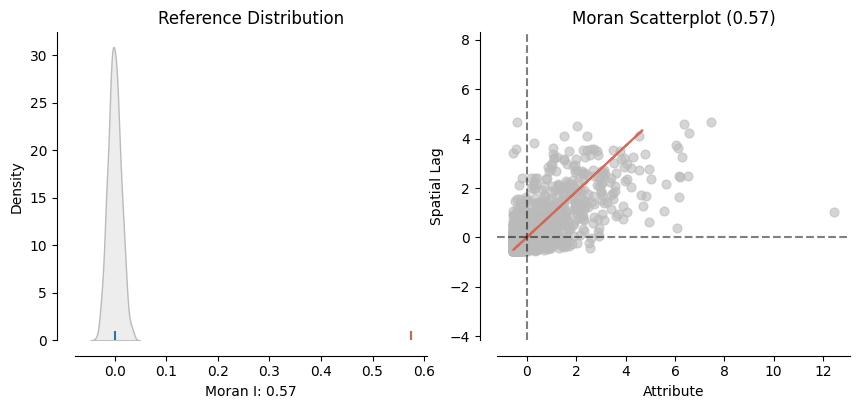

In [ ]:
plot_moran(moran_asian_lim, zstandard=True, figsize=(10,4))

A Moran's I value of 0.57 indicates a positive spatial autocorrelation in the variables, which means not completely spatial randomness, having relative spatial autocorrelation, and values tend to cluster together.

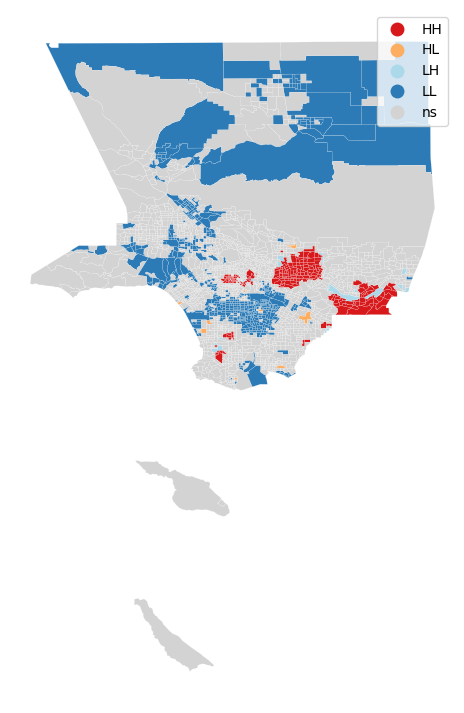

In [ ]:
moran_lim_asian_map = Moran_Local(y_asian_lim, w_asian_lim)
lisa_cluster(moran_lim_asian_map, merge_lim_eng, p=0.05, figsize = (9,9))
plt.show()

Cluster:
The hotspot area is located in San Gabriel Valley area, which represents areas where Limited-English speaking households in this area and its surroundings are more than average.

The Coldspot area is located in the DTLA area, and it represents significant clusters of less Limited-English households surrounded by less Limited-English speaking households.



## Estimate!!All households!!Households speaking --!Other languages

Text(0.5, 1.0, 'Limited English-speaking households --!! other languages')

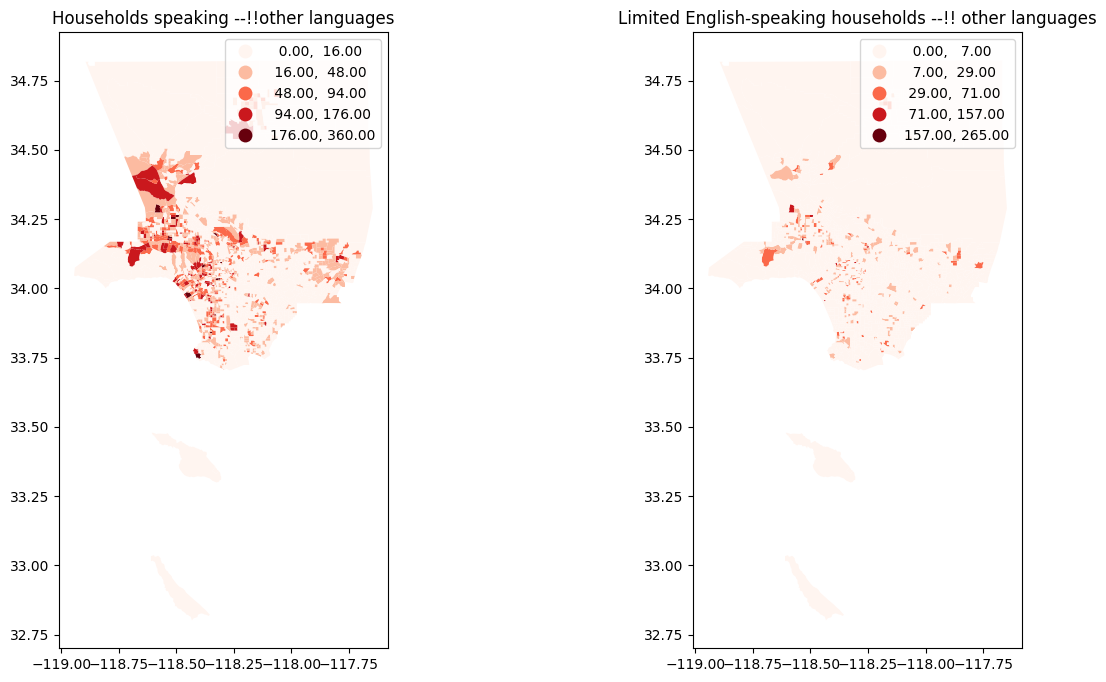

In [ ]:
fig, (ax1,ax2) = plt.subplots(1,2, figsize=(15,8))

merge_lim_eng.plot(column = 'S1602_C01_005E', scheme='fisher_jenks', cmap='Reds', legend=True, ax=ax1)
ax1.set_title('Households speaking --!!other languages')

merge_lim_eng.plot(column = 'S1602_C03_005E', scheme='fisher_jenks', cmap='Reds', legend=True, ax=ax2)
ax2.set_title('Limited English-speaking households --!! other languages')

### gobal moran

In [ ]:
y_other_lim = merge_lim_eng['S1602_C03_005E'].values
w_other_lim = Rook.from_dataframe(merge_lim_eng)
w_other_lim.transform = 'r'

<ipython-input-51-587e2716ee03>:2: FutureWarning: `use_index` defaults to False but will default to True in future. Set True/False directly to control this behavior and silence this warning
  w_other_lim = Rook.from_dataframe(merge_lim_eng)
/usr/local/lib/python3.10/dist-packages/libpysal/weights/contiguity.py:61: UserWarning: The weights matrix is not fully connected: 
 There are 2 disconnected components.
  W.__init__(self, neighbors, ids=ids, **kw)


In [ ]:
moran_other_lim = Moran(y_other_lim, w_other_lim)
print("Moran's I:", moran_other_lim.I)
print("Moran's p-val:", moran_other_lim.p_sim)

Moran's I: 0.06646369975123607
Moran's p-val: 0.002


/usr/local/lib/python3.10/dist-packages/splot/_viz_esda_mpl.py:354: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sbn.kdeplot(moran.sim, shade=shade, color=color, ax=ax, **kwargs)


(<Figure size 800x300 with 2 Axes>,
 array([<Axes: title={'center': 'Reference Distribution'}, xlabel='Moran I: 0.07', ylabel='Density'>,
        <Axes: title={'center': 'Moran Scatterplot (0.07)'}, xlabel='Attribute', ylabel='Spatial Lag'>],
       dtype=object))

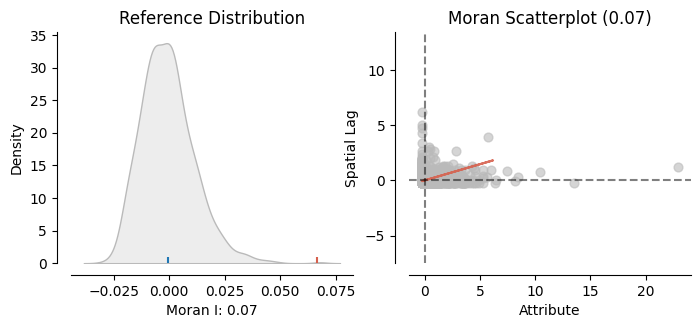

In [ ]:
plot_moran(moran_other_lim, zstandard=True, figsize=(8,3))

A value close to 0 indicates a lack of spatial autocorrelation. A Moran's I value of 0.07 indicates less positive spatial autocorrelation in the variables， which means generally spatial randomness, having less spatial autocorrelation.



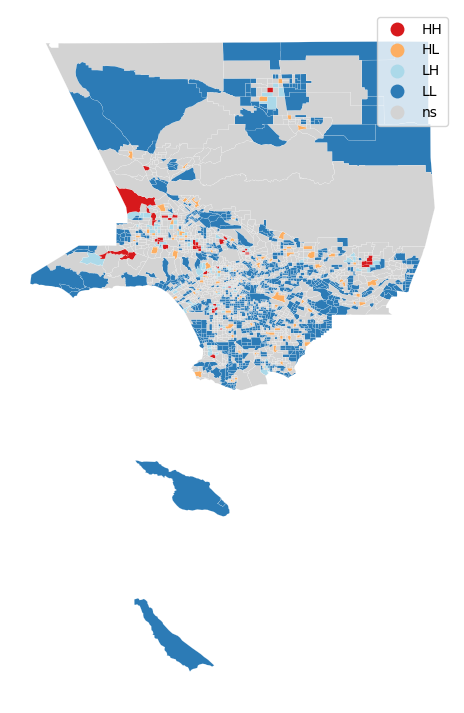

In [ ]:
moran_loc_other_lim = Moran_Local(y_other_lim, w_other_lim)
lisa_cluster(moran_loc_other_lim, merge_lim_eng, p=0.05, figsize = (9,9))
plt.show()

The coldspots are generally randomly distributed in LA county, hard to identify spatial patterns.

#

# spatial regression model analysis

## education-employement correlation
further result interpretation in [analysis_edu_eng.pdf](https://github.com/sujiatong/calteknet/blob/main/analysis_edu_eng.pdf)

In [ ]:
edu = ['S2301_C01_035E','S2301_C01_034E','S2301_C01_033E','S2301_C01_032E']

#S2301_C01_032E:
#EDUCATIONAL ATTAINMENT!!Population 25 to 64 years!!Less than high school graduate
#S2301_C01_033E
#Population 25 to 64 years!!High school graduate (includes equivalency)
#S2301_C01_034E
#Population 25 to 64 years!!Some college or associate's degree
#S2301_C01_035E
#Population 25 to 64 years!!Bachelor's degree or higher

In [ ]:
merge_labor_lim_eng['S1601_C05_022E'] = merge_labor_lim_eng['S1601_C05_022E'].astype(float)
#Speak English less than very well"!!Percent of specified language speakers!!CITIZENS 18 YEARS AND OVER!!All citizens 18 years old and over!!Speak a language other than English"

### OLS model

OLS is a global regression technique where a single set of model coefficients is estimated for the entire dataset.


In [ ]:
m1 = spreg.OLS(merge_labor_lim_eng[['S1601_C05_022E']].values, merge_labor_lim_eng[edu].values,
                  name_y = 'S1601_C05_022E', name_x = edu)

In [ ]:
print(m1.summary)

REGRESSION RESULTS
------------------

SUMMARY OF OUTPUT: ORDINARY LEAST SQUARES
-----------------------------------------
Data set            :     unknown
Weights matrix      :        None
Dependent Variable  :S1601_C05_022E                Number of Observations:        2495
Mean dependent var  :    414.7006                Number of Variables   :           5
S.D. dependent var  :    287.6663                Degrees of Freedom    :        2490
R-squared           :      0.3601
Adjusted R-squared  :      0.3590
Sum squared residual: 1.32075e+08                F-statistic           :    350.2332
Sigma-square        :   53042.096                Prob(F-statistic)     :  2.013e-239
S.E. of regression  :     230.309                Log likelihood        :  -17109.103
Sigma-square ML     :   52935.799                Akaike info criterion :   34228.207
S.E of regression ML:    230.0778                Schwarz criterion     :   34257.317

----------------------------------------------------------

The OLS model defines the correlation between the variables. In the OLS model, the R-square is 0.36, representing the English-limited speaker explains 36% of the educational attainment.
It suggests a moderate relationship between the English-limited speaker and educational attainment.

In [ ]:
pd.DataFrame(
{
# Pull out regression coefficients and
# flatten as they are returned as Nx1 array
"Coeff.": m1.betas.flatten(),
# Pull out and flatten standard errors
"Std. Error": m1.std_err.flatten(),
# Pull out P-values from t-stat object
"P-Value": [i[1] for i in m1.t_stat],
},
index=m1.name_x
# Round to four decimals
).round(3)

,Coeff.,Std. Error,P-Value
CONSTANT,62.220,13.319,0.000
S2301_C01_035E,0.076,0.010,0.000
S2301_C01_034E,-0.005,0.022,0.809
S2301_C01_033E,0.455,0.026,0.000
S2301_C01_032E,0.226,0.018,0.000


The coefficient of 0.076(Bachelor's degree or higher) represents the estimated change in the predicted value of the limited English speaker for a one-unit change in the independent variable (Bachelor's degree or higher).
This coefficient indicates a slightly positive relationship between limited English speakers and educational attainment.

The coefficient of -0.00527 (Some college or associate's degree) represents the estimated change in the predicted value of the limited English speaker for a one-unit change in the independent variable (Some college or associate's degree).

Since this coefficient is Negative, it indicates that as educational attainment(Some college or associate's degree) decreases, the likelihood of being a limited English speaker also decreases.

Moreover, the p-value of education attainment (Some college or associate's degree) is larger than 0.05, which means there is a non-significant relationship between limited English speakers and educational attainment (Some college or associate's degrees).

The coefficient of 0.455(High school graduate) represents the estimated change in the predicted value of the limited english speaker for a one-unit change in the independent variable (High school graduate). This is the highest coefficient, which is the strongest relationship between High school graduated and limited english speakers.

The coefficient of 0.226(Less than high school graduate) represents the estimated change in the predicted value of the limited english speaker for a one-unit change in the independent variable (Less thanHigh school graduate).

### SWLS model

SWLS explicitly incorporates spatial dependencies into the modeling process by assigning weights to observations based on their spatial proximity. This allows SWLS to account for spatial autocorrelation and produce more accurate parameter estimates.

In [ ]:
w_ = weights.KNN.from_dataframe(merge_labor_lim_eng, k=8)
w_.transform = 'R'
w_

In [ ]:
edu_swls = spreg.GM_Error_Het(
    # Dependent variable
    merge_labor_lim_eng[["S1601_C05_022E"]].values,
    # Independent variables
    merge_labor_lim_eng[edu].values,
    # Spatial weights matrix
    w=w_,
    # Dependent variable name
    name_y="S1601_C05_022E",
    # Independent variables names
    name_x=edu,
)

In [ ]:
print(edu_swls.summary)

REGRESSION RESULTS
------------------

SUMMARY OF OUTPUT: GM SPATIALLY WEIGHTED LEAST SQUARES (HET)
------------------------------------------------------------
Data set            :     unknown
Weights matrix      :     unknown
Dependent Variable  :S1601_C05_022E                Number of Observations:        2495
Mean dependent var  :    414.7006                Number of Variables   :           5
S.D. dependent var  :    287.6663                Degrees of Freedom    :        2490
Pseudo R-squared    :      0.3474
N. of iterations    :           1                Step1c computed       :          No

------------------------------------------------------------------------------------
            Variable     Coefficient       Std.Error     z-Statistic     Probability
------------------------------------------------------------------------------------
            CONSTANT        65.82114        16.47819         3.99444         0.00006
      S2301_C01_035E         0.07910         0.01267  

A Pseudo R-squared value of 0.34 suggests that approximately 34% of the variability in the "Limited English Speaker" variable is explained by the variation in the "Educational Attainment" variables.
It represents a moderate relationship between limited english and education attainment.

In [ ]:
pd.DataFrame(
{
# Pull out regression coefficients and
# flatten as they are returned as Nx1 array
"Coeff.": edu_swls.betas.flatten(),
# Pull out and flatten standard errors
"Std. Error": edu_swls.std_err.flatten(),
# Pull out P-values from t-stat object
"P-Value": [i[1] for i in edu_swls.z_stat],
},
index=edu_swls.name_x
# Round to four decimals
).round(3)

,Coeff.,Std. Error,P-Value
CONSTANT,65.821,16.478,0.0
S2301_C01_035E,0.079,0.013,0.0
S2301_C01_034E,0.095,0.021,0.0
S2301_C01_033E,0.274,0.027,0.0
S2301_C01_032E,0.261,0.026,0.0
lambda,0.771,0.016,0.0


The lowest coeficient of (S2301_C01_035E) Bachelor's degree or higher is 0.079, which is the weakest relationship between English speaker level and education attatinment.

The highest coeficient of(S2301_C01_032E) Less than high school graduate is 0.261, which is the strongest relationship between English speaker level and education attatinment.

limitation: the output results are different between the SWLS model and the OLS model. It needs to optimize the data or method for validating the result.
In this report, I use SWLS and OLS models to investigate the relationship between education attainment and limited-English speakers.

Throughout those two models, they indicate that the predictor (education attainment) in the model is moderately successful in explaining the variance in the dependent variable(limited English speaker).

## language-employement correlation
please see [analysis_pov_eng.pdf](https://github.com/sujiatong/calteknet/blob/main/analysis_pov_eng.pdf) to view the result interpretation

In [ ]:
less_well =['S1601_C05_006E','S1601_C05_010E','S1601_C05_014E','S1601_C05_018E']

In [ ]:
merge_labor_lim_eng['S2301_C04_021E'] = merge_labor_lim_eng['S2301_C04_021E'].astype(float)
#Estimate!!Unemployment rate!!Population 20 to 64 years

### OLS

In [ ]:
unemploy = spreg.OLS(merge_labor_lim_eng[['S2301_C04_021E']].values, merge_labor_lim_eng[less_well].values,
                  name_y = 'S2301_C04_021E', name_x = less_well)

In [ ]:
print(unemploy.summary)

REGRESSION RESULTS
------------------

SUMMARY OF OUTPUT: ORDINARY LEAST SQUARES
-----------------------------------------
Data set            :     unknown
Weights matrix      :        None
Dependent Variable  :S2301_C04_021E                Number of Observations:        2495
Mean dependent var  :      6.6778                Number of Variables   :           5
S.D. dependent var  :      4.0548                Degrees of Freedom    :        2490
R-squared           :      0.0223
Adjusted R-squared  :      0.0207
Sum squared residual:     40090.4                F-statistic           :     14.1893
Sigma-square        :      16.101                Prob(F-statistic)     :   1.872e-11
S.E. of regression  :       4.013                Log likelihood        :   -7004.369
Sigma-square ML     :      16.068                Akaike info criterion :   14018.739
S.E of regression ML:      4.0085                Schwarz criterion     :   14047.849

----------------------------------------------------------

The OLS model defines the correlation between the variables. In the OLS model, the R-square is 0.0223, representing the unemployment explains 2.23% of the speaking English less well.
It suggests a weak relationship between the limited English speaker and the unemployment rate.

In [ ]:
pd.DataFrame(
{
# Pull out regression coefficients and
# flatten as they are returned as Nx1 array
"Coeff.": unemploy.betas.flatten(),
# Pull out and flatten standard errors
"Std. Error": unemploy.std_err.flatten(),
# Pull out P-values from t-stat object
"P-Value": [i[1] for i in unemploy.t_stat],
},
index=unemploy.name_x
# Round to four decimals
).round(3)

,Coeff.,Std. Error,P-Value
CONSTANT,6.190,0.139,0.000
S1601_C05_006E,0.001,0.000,0.000
S1601_C05_010E,0.003,0.001,0.000
S1601_C05_014E,-0.001,0.000,0.011
S1601_C05_018E,0.002,0.004,0.529


The p-values for speaking English very well and those who speak other languages are larger than 0.05, meaning there is a non-significant relationship between limited English speakers and the unemployment rate.

The coefficient for speaking English less well who speaks Asian and Pacific Island languages is -.0001, which indicates that as speaking English less well who speaking Asian and Pacific Island languages decreases, the likelihood of an unemployment rate also decreases.

### SWLS

In [ ]:
w_ = weights.KNN.from_dataframe(merge_labor_lim_eng, k=8)
w_.transform = 'R'
w_

In [ ]:
less_swls = spreg.GM_Error_Het(
    # Dependent variable
    merge_labor_lim_eng[["S2301_C04_021E"]].values,
    # Independent variables
    merge_labor_lim_eng[less_well].values,
    # Spatial weights matrix
    w=w_,
    # Dependent variable name
    name_y="S2301_C04_021E",
    # Independent variables names
    name_x=less_well,
)

In [ ]:
print(less_swls.summary)

REGRESSION RESULTS
------------------

SUMMARY OF OUTPUT: GM SPATIALLY WEIGHTED LEAST SQUARES (HET)
------------------------------------------------------------
Data set            :     unknown
Weights matrix      :     unknown
Dependent Variable  :S2301_C04_021E                Number of Observations:        2495
Mean dependent var  :      6.6778                Number of Variables   :           5
S.D. dependent var  :      4.0548                Degrees of Freedom    :        2490
Pseudo R-squared    :      0.0219
N. of iterations    :           1                Step1c computed       :          No

------------------------------------------------------------------------------------
            Variable     Coefficient       Std.Error     z-Statistic     Probability
------------------------------------------------------------------------------------
            CONSTANT         6.20762         0.20731        29.94392         0.00000
      S1601_C05_006E         0.00085         0.00024  

The SWLS model defines the correlation between the variables. In the SWLS model, the R-square is 0.0219, representing the unemployment explains 2.19% of the speaking english very well.
It suggests a weak relationship between the well English speaker and unemployee rate.

In [ ]:
pd.DataFrame(
{
# Pull out regression coefficients and
# flatten as they are returned as Nx1 array
"Coeff.": less_swls.betas.flatten(),
# Pull out and flatten standard errors
"Std. Error": less_swls.std_err.flatten(),
# Pull out P-values from t-stat object
"P-Value": [i[1] for i in less_swls.z_stat],
},
index=less_swls.name_x
# Round to four decimals
).round(3)

,Coeff.,Std. Error,P-Value
CONSTANT,6.208,0.207,0.000
S1601_C05_006E,0.001,0.000,0.000
S1601_C05_010E,0.003,0.001,0.001
S1601_C05_014E,-0.001,0.000,0.132
S1601_C05_018E,0.003,0.003,0.306
lambda,0.399,0.038,0.000


The p-values for speaking English very well and those who speak other languages are larger than 0.05, meaning there is a non-significant relationship between limited English speakers and the unemployment rate.

The coefficient for speaking English less well who speaks Asian and Pacific Island languages is -.0001, which indicates that as speaking English less well who speaking Asian and Pacific Island languages decreases, the likelihood of an unemployment rate also decreases.

Throughout the models, the unemploye rate has less explained the enlish speaking, meaning english speak level does not strongly asscosiate with unemployment rate

## Poverty and English speaker level

further result interpretation in [analysis_pov_eng.pdf](https://github.com/sujiatong/calteknet/blob/main/analysis_employ_eng.pdf)

In [ ]:
#S2301_C01_028E: Population 20 to 64 years!!POVERTY STATUS IN THE PAST 12 MONTHS!!Below poverty level

In [ ]:
pov_ols = spreg.OLS(merge_labor_lim_eng[['S2301_C01_028E']].values, merge_labor_lim_eng[less_well].values,
                  name_y = 'S2301_C01_028E', name_x = less_well)

In [ ]:
print(pov_ols.summary)

REGRESSION RESULTS
------------------

SUMMARY OF OUTPUT: ORDINARY LEAST SQUARES
-----------------------------------------
Data set            :     unknown
Weights matrix      :        None
Dependent Variable  :S2301_C01_028E                Number of Observations:        2495
Mean dependent var  :    294.9126                Number of Variables   :           5
S.D. dependent var  :    213.1207                Degrees of Freedom    :        2490
R-squared           :      0.3087
Adjusted R-squared  :      0.3076
Sum squared residual: 7.83047e+07                F-statistic           :    278.0318
Sigma-square        :   31447.688                Prob(F-statistic)     :  8.671e-198
S.E. of regression  :     177.335                Log likelihood        :  -16456.960
Sigma-square ML     :   31384.666                Akaike info criterion :   32923.920
S.E of regression ML:    177.1572                Schwarz criterion     :   32953.030

----------------------------------------------------------

The OLS model defines the correlation between the variables. In the OLS model, the R-square is 0.3087, representing the poverty status explains 30.87% of the limited English speakers.
It suggests a moderate relationship between poverty status and limited English speaker.

In [ ]:
pd.DataFrame(
{
# Pull out regression coefficients and
# flatten as they are returned as Nx1 array
"Coeff.": pov_ols.betas.flatten(),
# Pull out and flatten standard errors
"Std. Error": pov_ols.std_err.flatten(),
# Pull out P-values from t-stat object
"P-Value": [i[1] for i in pov_ols.t_stat],
},
index=pov_ols.name_x
# Round to four decimals
).round(3)

,Coeff.,Std. Error,P-Value
CONSTANT,144.531,6.132,0.0
S1601_C05_006E,0.277,0.008,0.0
S1601_C05_010E,0.289,0.036,0.0
S1601_C05_014E,0.109,0.017,0.0
S1601_C05_018E,0.942,0.161,0.0



The highest coeficient of Other languages who speak English less than very well is 0.942, which is the strongest relationship between Poverty and English speaker level.

The coefficient of 0.942 represents the estimated change in the dependent variable (below poverty level) associated with a one-unit increase in the independent variable (proportion of people who speak other languages and have limited English proficiency), holding all other variables constant.

The lowest coeficient of Asian and Pacific Island languages who speak English less than very well is 0.109, which is the weakest relationship between Poverty and English speaker level.
The coefficient of 0.109 represents the estimated change in the dependent variable (below poverty level) associated with a one-unit increase in the independent variable (proportion of people who speak Asian and Pacific Island languages and have limited English proficiency), holding all other variables constant.

### swls

In [ ]:
pov_swls = spreg.GM_Error_Het(
    # Dependent variable
    merge_labor_lim_eng[["S2301_C01_028E"]].values,
    # Independent variables
    merge_labor_lim_eng[less_well].values,
    # Spatial weights matrix
    w=w_,
    # Dependent variable name
    name_y="S2301_C01_028E",
    # Independent variables names
    name_x=less_well,
)

In [ ]:
print(pov_swls.summary)

REGRESSION RESULTS
------------------

SUMMARY OF OUTPUT: GM SPATIALLY WEIGHTED LEAST SQUARES (HET)
------------------------------------------------------------
Data set            :     unknown
Weights matrix      :     unknown
Dependent Variable  :S2301_C01_028E                Number of Observations:        2495
Mean dependent var  :    294.9126                Number of Variables   :           5
S.D. dependent var  :    213.1207                Degrees of Freedom    :        2490
Pseudo R-squared    :      0.3035
N. of iterations    :           1                Step1c computed       :          No

------------------------------------------------------------------------------------
            Variable     Coefficient       Std.Error     z-Statistic     Probability
------------------------------------------------------------------------------------
            CONSTANT       122.97275         8.38457        14.66656         0.00000
      S1601_C05_006E         0.28960         0.01153  

A Pseudo R-squared value of 0.3035 suggests that approximately 30.35% of the variability in the dependent variable("Below poverty level") is explained by the variation in the independent variables (Limited English Speaker).
It suggests a moderate relationship between poverty status and limited English speakers.

In [ ]:
pd.DataFrame(
{
# Pull out regression coefficients and
# flatten as they are returned as Nx1 array
"Coeff.": pov_swls.betas.flatten(),
# Pull out and flatten standard errors
"Std. Error": pov_swls.std_err.flatten(),
# Pull out P-values from t-stat object
"P-Value": [i[1] for i in pov_swls.z_stat],
},
index=pov_swls.name_x
# Round to four decimals
).round(3)

,Coeff.,Std. Error,P-Value
CONSTANT,122.973,8.385,0.0
S1601_C05_006E,0.290,0.012,0.0
S1601_C05_010E,0.370,0.054,0.0
S1601_C05_014E,0.183,0.021,0.0
S1601_C05_018E,0.832,0.170,0.0
lambda,0.538,0.040,0.0


The highest coeficient of Other languages who speak english less than very well is 0.832, which is the strongest relationship between Poverty and English speaker level.
The coefficient of 0.832 represents the estimated change in the dependent variable (below poverty level) associated with a one-unit increase in the independent variable (proportion of people who speak other languages and have limited English proficiency), holding all other variables constant.

The lowest coeficient of Asian and Pacific Island languages who speak english less than very well is 0.109, which is the weakest relationship between Poverty and English speaker level.
The coefficient of 0.109 represents the estimated change in the dependent variable (below poverty level) associated with a one-unit increase in the independent variable (proportion of people who speak Asian and Pacific Island languages and have limited English proficiency), holding all other variables constant.